In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1999) # my birth year XD

In [2]:
x = [x for x in range(1, 100)]
y = [float(x + np.abs(np.random.normal(0,10,1))) for x in range(1,100)]

In [3]:
data = pd.DataFrame({'study_time':x, 'marks':y})
data

,study_time,marks
0,1,4.174801
1,2,8.920623
2,3,15.843776
3,4,7.933458
4,5,7.118029
...,...,...
94,95,96.438280
95,96,112.002005
96,97,105.620602
97,98,106.712406


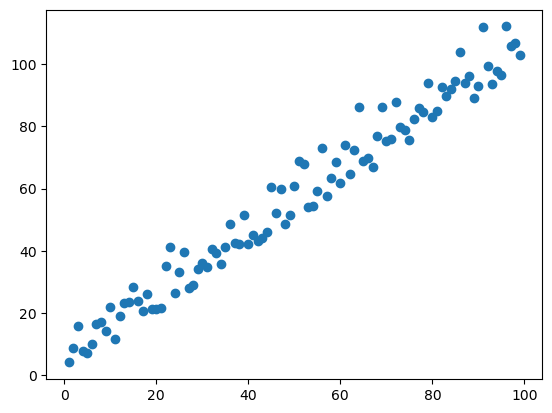

In [4]:
plt.scatter(data['study_time'],data['marks'])

In [5]:
"""
Just for study purpose I have kept the function, can't use it as python can't differenciate it automatically
"""

def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['study_hours']
        y = points.iloc[i]['marks']
        predicted_y = (m*x) + b
        total_error += (predicted_y-y)**2
    total_error = total_error/len(points)
    return total_error

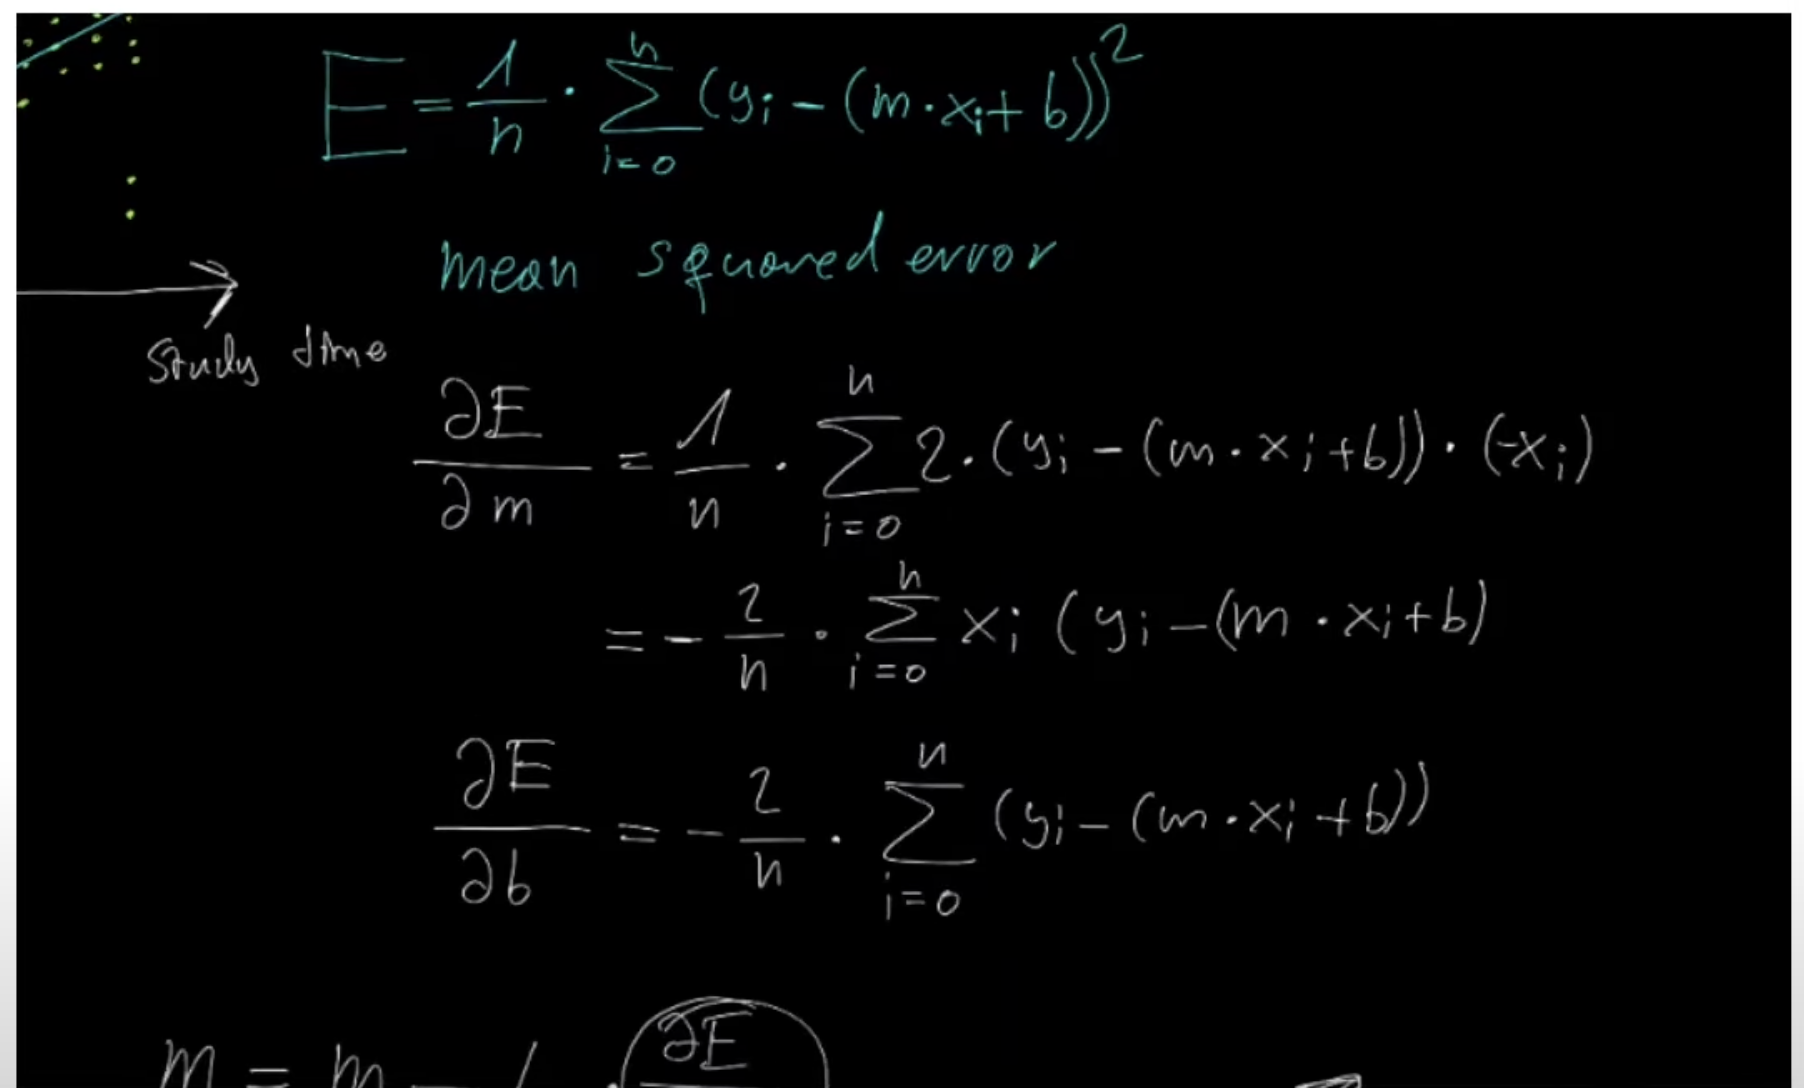

In [6]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i]['study_time']
        y = points.iloc[i]['marks']
        
        m_gradient += -(2/n) * x * (y - (m_now*x + b_now))
        b_gradient += -(2/n) * (y - (m_now*x + b_now))
        
    m = m_now - (L * m_gradient)
    b = b_now - (L * b_gradient)
    
    return m,b

In [7]:
m = 0
b = 0
L = 0.0001 # if you take learning rate to be 0.001 (in-this-particular-case, it will not converge and give an error)
ephocs = 1000 # run the loop for around 1000 iterations

# Explained the error with learning rates
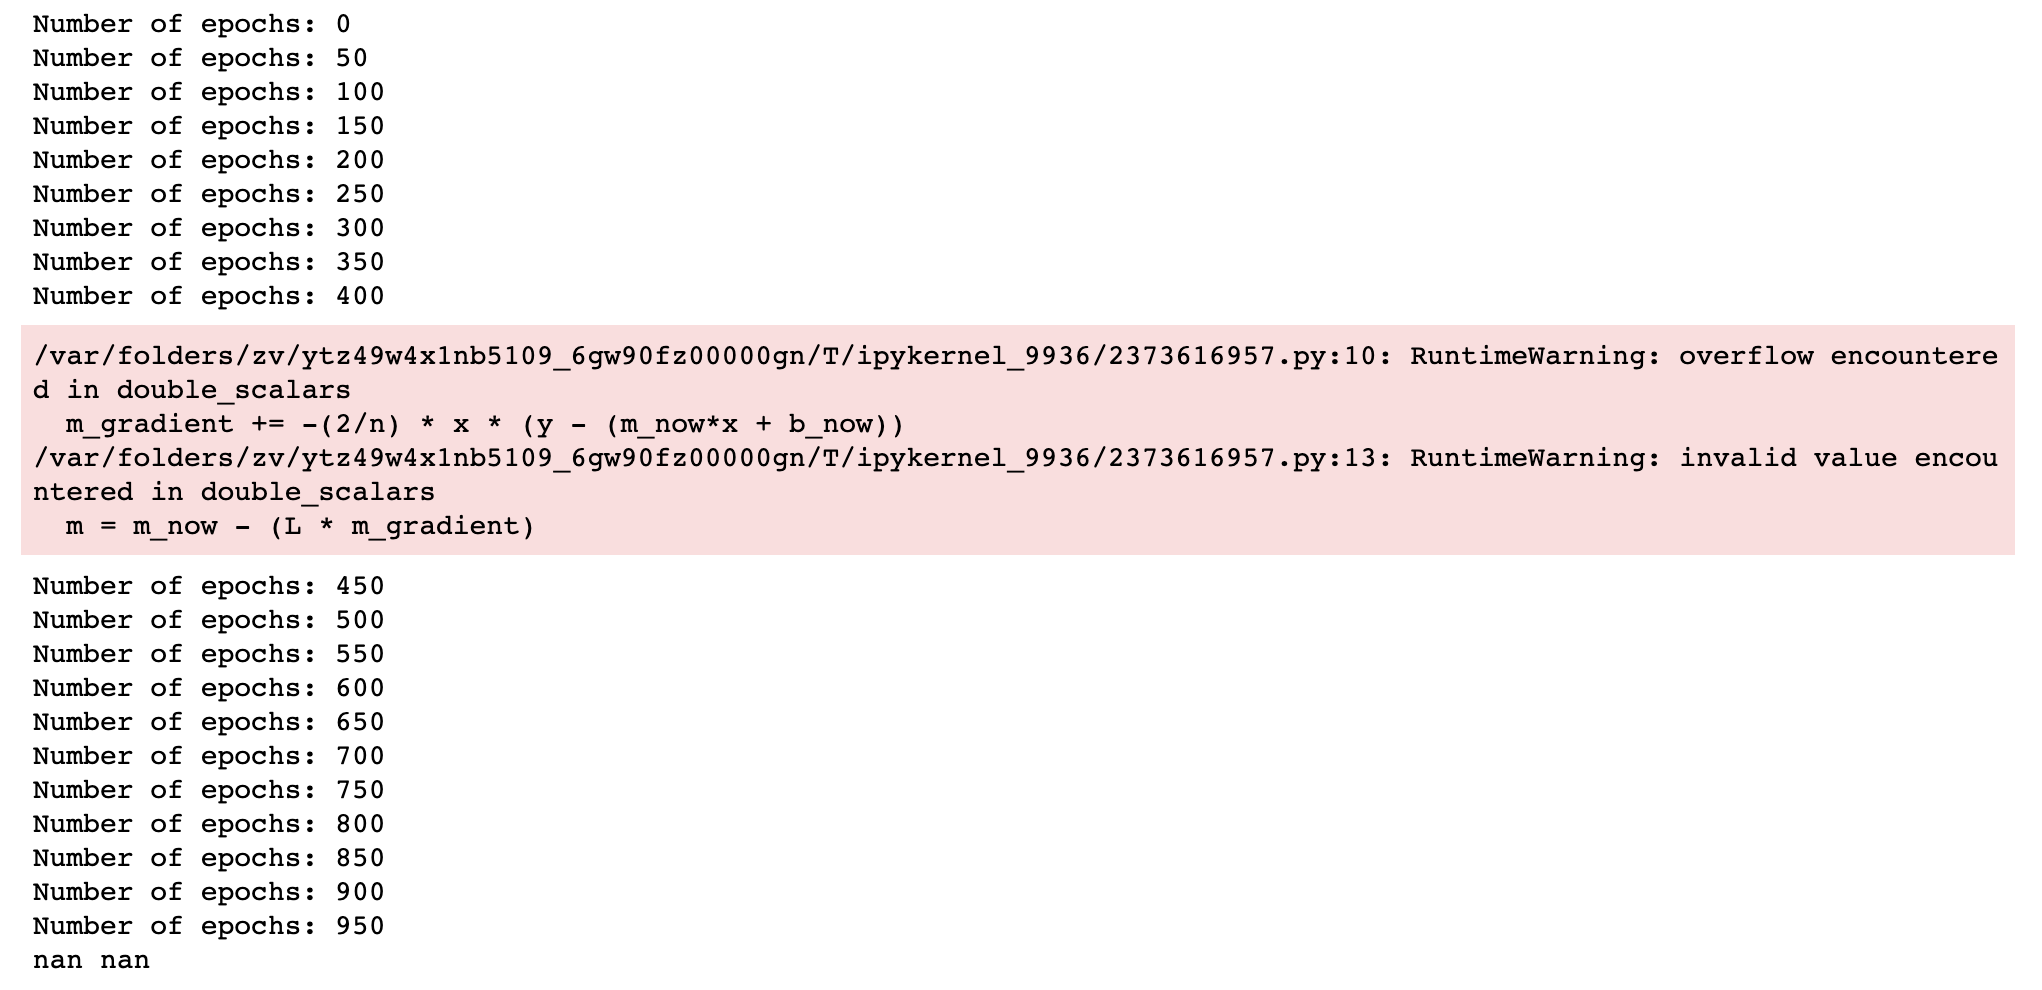

- This is the reason why adaptive learning rate or stochastic gradient descent was developed. Read more here: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [8]:
for i in range(ephocs):
    if i%50 == 0:
        print(f"Number of epochs: {i}")
    m, b = gradient_descent(m,b,data,L)
print(m,b)

Number of epochs: 0
Number of epochs: 50
Number of epochs: 100
Number of epochs: 150
Number of epochs: 200
Number of epochs: 250
Number of epochs: 300
Number of epochs: 350
Number of epochs: 400
Number of epochs: 450
Number of epochs: 500
Number of epochs: 550
Number of epochs: 600
Number of epochs: 650
Number of epochs: 700
Number of epochs: 750
Number of epochs: 800
Number of epochs: 850
Number of epochs: 900
Number of epochs: 950
1.105284218434963 0.3236659538875375


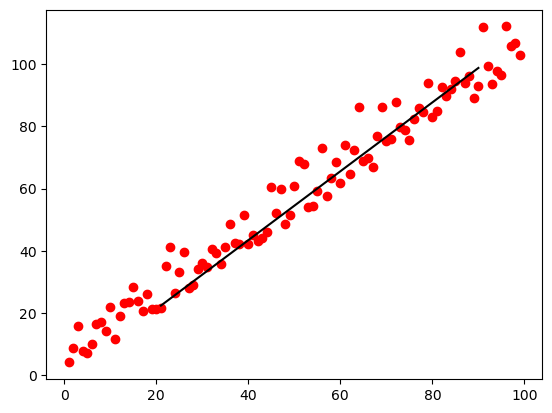

In [9]:
plt.scatter(data['study_time'],data['marks'], color='red')
plt.plot([data.iloc[x]['study_time'] for x in range(20,90)],[m*x + b for x in range(20,90)], color='black')
plt.show()

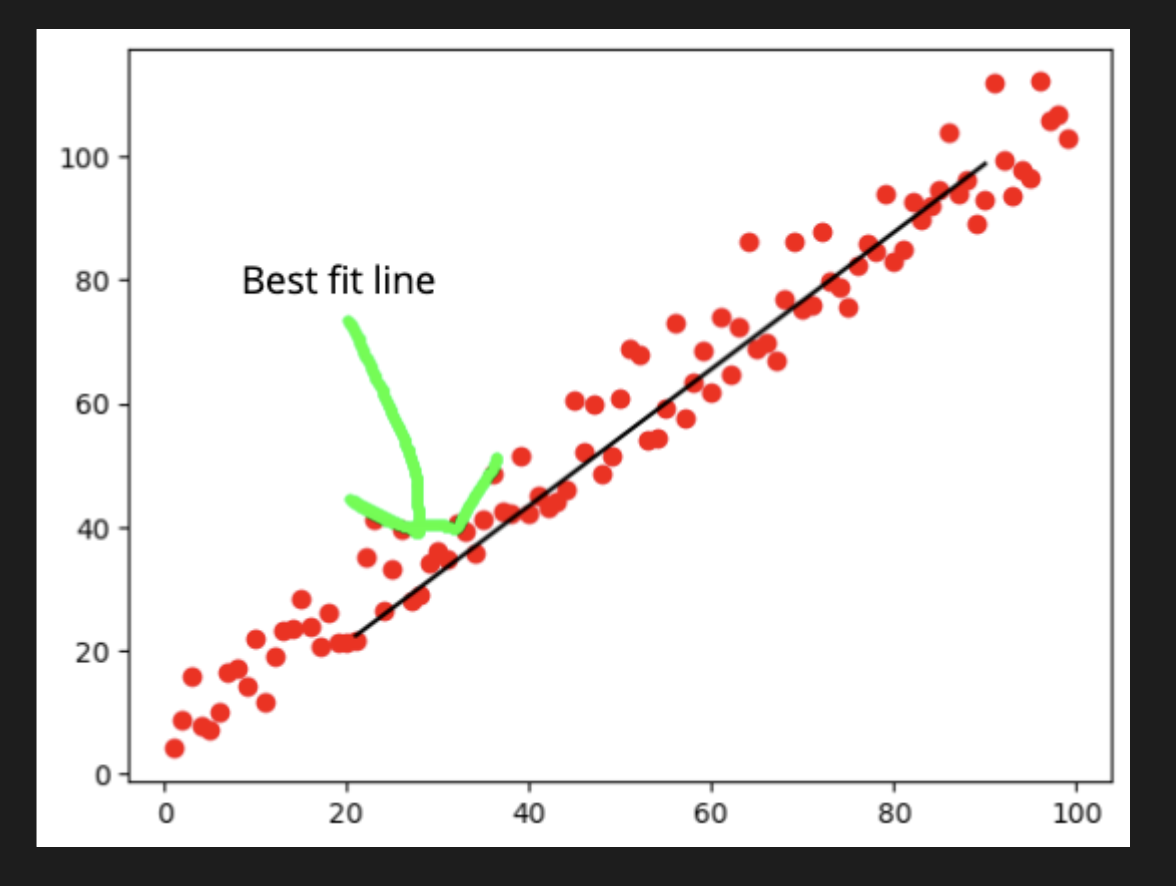